In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
businesses = pd.read_json('Portfolio/yelp_business.json', lines=True)
reviews = pd.read_json('Portfolio/yelp_review.json', lines=True)
users = pd.read_json('Portfolio/yelp_user.json', lines=True)
checkins = pd.read_json('Portfolio/yelp_checkin.json', lines=True)
tips = pd.read_json('Portfolio/yelp_tip.json', lines=True)
photos = pd.read_json('Portfolio/yelp_photo.json', lines=True)


In [4]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [5]:
businesses.head()
reviews.head()
users.head()
checkins.head()
tips.head()
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [6]:
businesses.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards'],
      dtype='object')

In [7]:
reviews.columns

Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 188593 non-null  object 
 1   average_number_friends      188593 non-null  float64
 2   average_days_on_yelp        188593 non-null  float64
 3   average_number_fans         188593 non-null  float64
 4   average_review_count        188593 non-null  float64
 5   average_number_years_elite  188593 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.6+ MB


In [9]:
checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   business_id       157075 non-null  object
 1   time              157075 non-null  object
 2   weekday_checkins  157075 non-null  int64 
 3   weekend_checkins  157075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121526 entries, 0 to 121525
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         121526 non-null  object 
 1   average_tip_length  121526 non-null  float64
 2   number_tips         121526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB


In [11]:
photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32976 entries, 0 to 32975
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             32976 non-null  object 
 1   average_caption_length  32976 non-null  float64
 2   number_pics             32976 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 773.0+ KB


In [12]:
merge1 = pd.merge(businesses, reviews, how='inner', on='business_id')

In [13]:
merge2 = pd.merge(users, checkins, how='inner', on='business_id')

In [14]:
big_merge = pd.merge(merge1, merge2, how='inner', on='business_id')

In [15]:
merge3 = pd.merge(tips, photos, how='inner', on='business_id')

In [16]:
main_merge = pd.merge(big_merge, merge3, how='inner', on='business_id')

In [17]:
main_merge.isna().any()

address                       False
alcohol?                      False
attributes                     True
business_id                   False
categories                     True
city                          False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
hours                          True
is_open                       False
latitude                      False
longitude                     False
name                          False
neighborhood                  False
postal_code                   False
price_range                   False
review_count                  False
stars                         False
state                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes         

In [18]:
main_merge.fillna({'attributes': 0, 'categories': 0, 'hours': 0,}, inplace=True)

In [19]:
main_merge.isna().any()

address                       False
alcohol?                      False
attributes                    False
business_id                   False
categories                    False
city                          False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
hours                         False
is_open                       False
latitude                      False
longitude                     False
name                          False
neighborhood                  False
postal_code                   False
price_range                   False
review_count                  False
stars                         False
state                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes         

In [20]:
main_merge.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

In [21]:
main_merge['stars'].corr

<bound method Series.corr of 0        4.5
1        2.5
2        4.0
3        4.0
4        2.5
        ... 
30120    3.5
30121    4.5
30122    3.0
30123    3.5
30124    4.0
Name: stars, Length: 30125, dtype: float64>

In [64]:
features = main_merge[['average_review_length', 'average_review_age', 'price_range', 'average_number_friends']]

In [65]:
ratings = main_merge[['stars']]

In [66]:
model = LinearRegression()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 100)

In [96]:
model.fit(X_train, y_train)

LinearRegression()

In [97]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [98]:
print(train_score)

0.0437123600736411


In [99]:
print(test_score)

0.03812994412103743


In [100]:
y_predicted = model.predict(X_test)

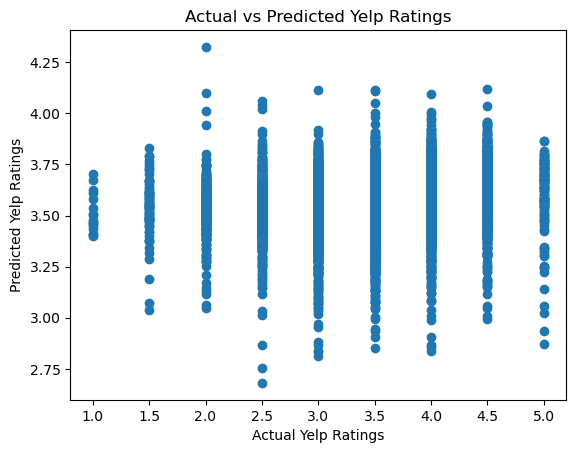

In [101]:
plt.scatter(y_test, y_predicted)
plt.ylabel('Predicted Yelp Ratings')
plt.xlabel('Actual Yelp Ratings')
plt.title('Actual vs Predicted Yelp Ratings')
plt.show()